In [1]:
from pathlib import Path
import sys

notebook_dir = Path.cwd()
others_path = notebook_dir.parent

others_path = others_path.resolve()
if str(others_path) not in sys.path:
    sys.path.append(str(others_path))

import numpy as np
import matplotlib.pyplot as plt

import eos
import kernels
import gaussianprocess
from pqcd.pQCD import pQCD
import prepare_ceft as pc
import prepare_pqcd as pp
import sampling as sam
import anal_helpers as anal
from constants import ns, crust_end, get_phi


In [2]:
x = np.array([
    0,1,2,3,4,5,6,7,8,9,10,12,14,16,18,20
])

In [3]:
y = np.array(
    [   26.8,
        26.8,
        26.5,
        26,
        25.5,
        25.15,
        24.95,
        24.9,
        24.85,
        24.8,
        24.75,
        24.5,
        24.2,
        23.9,
        23.6,
        23.3
    ]
)

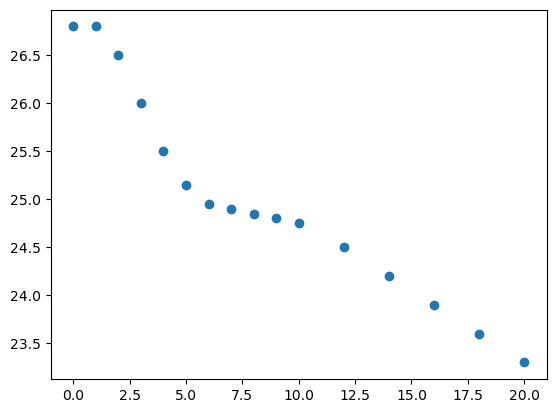

In [4]:
plt.scatter(x,y)

In [17]:
x1 = np.asarray([24, 24.1, 24.2, 24.3, 24.4, 24.5])
y1 = np.asarray([7.1, 7.15, 7.2,7.25, 7.3, 7.35 ])
noise1 = np.asarray([0.2,1,1,1,1,0.5])

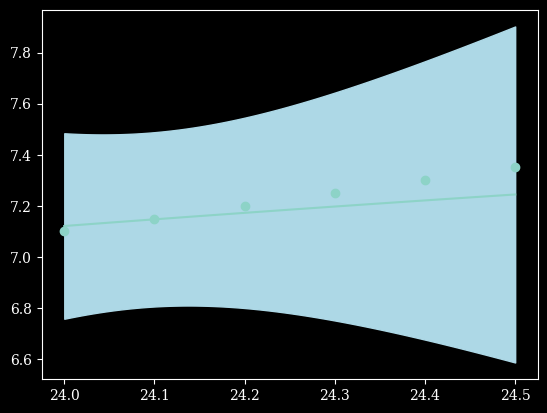

In [18]:
kernel1 = kernels.Kernel('SE', sigma=10, l=10)
gp1 = gaussianprocess.GP(kernel1)
x_test1 = np.linspace(24, 24.5, 100)
gp1.fit(x1, x_test1, y1, var_f= noise1, stabilise=True)

y_test1, sig1 = gp1.posterior(sampling=False)

y_test1 = y_test1.flatten()

plt.plot(x_test1,y_test1)
plt.fill_between(x_test1.ravel(), y_test1 - 1.96 * sig1, y_test1 + 1.96 * sig1, alpha=1, color='lightblue')
plt.scatter(x1,y1)

plt.show()

In [22]:
noise = np.array([
    1,25,10,8,5,50,50,50,50,50,25,10,5,2.5,1,0.1
]) * 0.01

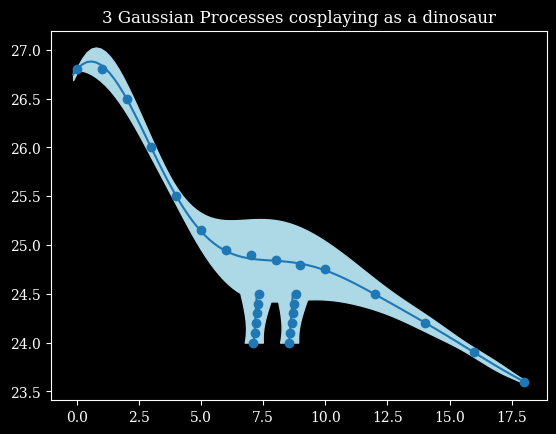

In [23]:
kernel = kernels.Kernel('SE', sigma=10, l=5)
gp = gaussianprocess.GP(kernel)
x_test = np.linspace(-0.15, 18, 100)
gp.fit(x, x_test, y, var_f= noise, stabilise=True)

y_test, sig = gp.posterior(sampling=False)

y_test = y_test.flatten()

kernel1 = kernels.Kernel('SE', sigma=10, l=10)
gp1 = gaussianprocess.GP(kernel1)
x_test1 = np.linspace(24, 24.5, 100)
gp1.fit(x1, x_test1, y1, var_f= noise1, stabilise=True)

y_test1, sig1 = gp1.posterior(sampling=False)

y_test1 = y_test1.flatten()


plt.style.use('dark_background')
ax = plt.gca()
ax.set_facecolor('black')
plt.rcParams["font.family"] = "serif"


plt.plot(x_test,y_test, color = "#1f77b4")
plt.fill_between(x_test.ravel(), y_test - 1.96 * sig, y_test + 1.96 * sig, alpha=1, color='lightblue')
plt.scatter(x[:-1],y[:-1], color = "#1f77b4")

plt.plot(y_test1,x_test1, color = "#1f77b4")
plt.fill_betweenx(x_test1.ravel(), y_test1 - 1.96 * sig1, y_test1 + 1.96 * sig1, alpha=1, color='lightblue')
plt.scatter(y1,x1,color = "#1f77b4")

plt.plot(1.2*y_test1,x_test1, color = "#1f77b4")
plt.fill_betweenx(x_test1.ravel(), 1.2*y_test1 - 1.96 * sig1, 1.2*y_test1 + 1.96 * sig1, alpha=1, color='lightblue')
plt.scatter(1.2*y1,x1,color = "#1f77b4")


plt.title("3 Gaussian Processes cosplaying as a dinosaur")
plt.show()